<a href="https://colab.research.google.com/github/pawelpuszcz/timeseries-data-analysis/blob/main/BPTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Dane z pliku csv oddzielone są średnikiem, natomiast w pliku csv dane oddzielone są przecinkiem (Comma Separated Values).
2. Dane nie zawierają wartości NULL-owych.
3. Dane zawierają trzy kolumny o nazwach: dataStream, rowCount i probingTimestamp
4. Dane zawierają 160735 rekordów.
5. Typy danych to kolejno: object, int64, object
6.Unikalność:
* Dane kolumny dataStream zawierają ten sam wpis dla wszystkich rekordów
* Dane kolumny rowCount zawierają 6612 unikalnych wpisów
* Dane kolumny probingTimestamp zawierają 160513 unikalnych wpisów

7. Dane DataFrame zawierają 222 zduplikowane rekordy do usunięcia.
8. Dane ‘zaczynają się’ 10 stycznia 2020 roku (2020-01-10 10:04:18.837), natomiast ‘kończą się’ 2 maja 2020 roku (2020-05-02 08:00:00.120)
9. Kolumna probingTimestamp zawiera niewłaściwy typ danych (dtype). Zmiana z dtype object na dtype datetime64[ns].
10. Wartości z kolumny rowCount rosną od 10 stycznia 2020 roku (2020-01-10 10:04:18.837), osiągają największą wartość  6 marca 2020 roku dla przedziału czasowego od godziny 09:03:00.980 do godziny 09:58:00.510.
11. Od 6 marca do 9 marca 2020 roku wartości z kolumny rowCount spadają, osiągając najniższą wartość 9 marca 2020 roku dla przedziału czasowego od godziny 13:38:00.147 do godziny 14:00:00.283.
12. W spadku wskazanym powyżej pomiędzy datami 6 marca i 9 marca 2020 roku następuje wzrost wartości z kolumny rowCount pomiędzy godziną 14:38 (6 marca) i godziną 09:04 (9 marca). Wzrost ten następuje w weekend zaczynając od 6 marca - piątku popołudnia, przez sobotę i niedzielę, kończąc 9 marca w poniedziałek w godzinach porannych.
13. Od 9 marca 2020 roku wartości z kolumny rowCount rosną do 2 maja 2020 roku (2020-05-02 08:00:00.120).
14. Rekordy zapisywane są przez 114 dni
15. Różnica pomiędzy zapisami czasowymi wynosi ok 1 minuty dla większości 160179 rekordów (przedział czasowy <55s : 01m05s>)
16. Dla kilku rekordów różnica pomiędzy zapisami czasowymi wynosi ok 1 godziny.
17. Największa różnica pomiędzy zapisami czasowymi jest bliska jednej doby (23:38:42.740000).



In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

%matplotlib inline

In [180]:
df = pd.read_csv('https://bitpeak.pl/datasets/BCL_TaskCreation.csv', sep=';')

In [181]:
df.head()

,dataStream,rowCount,probingTimestamp
0,BCL_TaskCreation,315349655,2020-01-13 09:33:00.497
1,BCL_TaskCreation,315349655,2020-01-13 09:34:00.157
2,BCL_TaskCreation,314533770,2020-01-11 01:18:00.143
3,BCL_TaskCreation,289249872,2020-04-05 16:10:00.333
4,BCL_TaskCreation,289249872,2020-04-05 16:11:00.883


In [182]:
df.tail()

,dataStream,rowCount,probingTimestamp
160730,BCL_TaskCreation,289702842,2020-05-02 04:43:00.767
160731,BCL_TaskCreation,289702943,2020-05-02 07:26:01.040
160732,BCL_TaskCreation,289702883,2020-05-02 06:10:00.157
160733,BCL_TaskCreation,289702842,2020-05-02 04:18:00.117
160734,BCL_TaskCreation,289702883,2020-05-02 06:11:00.597


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160735 entries, 0 to 160734
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   dataStream        160735 non-null  object
 1   rowCount          160735 non-null  int64 
 2   probingTimestamp  160735 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.7+ MB


In [184]:
len(df.dataStream.unique())

1

In [185]:
len(df.rowCount.unique())

6612

In [186]:
len(df.probingTimestamp.unique())

160513

In [187]:
df.drop_duplicates(inplace=True)

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160513 entries, 0 to 160734
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   dataStream        160513 non-null  object
 1   rowCount          160513 non-null  int64 
 2   probingTimestamp  160513 non-null  object
dtypes: int64(1), object(2)
memory usage: 4.9+ MB


In [189]:
df.rowCount.value_counts()

318665910    3951
317651677    2831
285498466    1380
325841983    1337
289503125     520
             ... 
319425910       1
315847897       1
326091983       1
314811587       1
334413736       1
Name: rowCount, Length: 6612, dtype: int64

In [190]:
df.axes

[Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                  8,      9,
             ...
             160725, 160726, 160727, 160728, 160729, 160730, 160731, 160732,
             160733, 160734],
            dtype='int64', length=160513),
 Index(['dataStream', 'rowCount', 'probingTimestamp'], dtype='object')]

In [191]:
df.shape

(160513, 3)

In [192]:
df.count()

dataStream          160513
rowCount            160513
probingTimestamp    160513
dtype: int64

In [193]:
df.sort_values(by='probingTimestamp', inplace=True)

In [194]:
df.head(3)

,dataStream,rowCount,probingTimestamp
3506,BCL_TaskCreation,314015548,2020-01-10 10:04:18.837
3505,BCL_TaskCreation,314015548,2020-01-10 10:16:29.063
3507,BCL_TaskCreation,314015548,2020-01-10 10:17:00.510


In [195]:
df.tail(3)

,dataStream,rowCount,probingTimestamp
160369,BCL_TaskCreation,289702943,2020-05-02 07:58:00.083
160373,BCL_TaskCreation,289702943,2020-05-02 07:59:00.543
160058,BCL_TaskCreation,289702943,2020-05-02 08:00:00.120


In [196]:
df.dtypes

dataStream          object
rowCount             int64
probingTimestamp    object
dtype: object

In [197]:
df['probingTimestamp'] = pd.to_datetime(df['probingTimestamp'])

In [198]:
df.dtypes

dataStream                  object
rowCount                     int64
probingTimestamp    datetime64[ns]
dtype: object

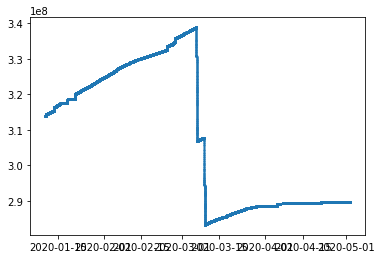

In [199]:
plt.scatter(df['probingTimestamp'], df['rowCount'], s=1)
plt.show()

In [200]:
df.probingTimestamp.max()

Timestamp('2020-05-02 08:00:00.120000')

In [201]:
df.probingTimestamp.min()

Timestamp('2020-01-10 10:04:18.837000')

In [202]:
df.rowCount.max()

338841446

In [203]:
df.rowCount.min()

283240055

In [204]:
df.probingTimestamp.where(df.rowCount == df.rowCount.max()).dropna().head()

80086   2020-03-06 09:03:00.980
80087   2020-03-06 09:04:00.467
80657   2020-03-06 09:05:01.010
80656   2020-03-06 09:06:00.503
80590   2020-03-06 09:07:00.037
Name: probingTimestamp, dtype: datetime64[ns]

In [205]:
df.probingTimestamp.where(df.rowCount == df.rowCount.max()).dropna().tail()

80386   2020-03-06 09:54:00.550
80400   2020-03-06 09:55:00.043
80401   2020-03-06 09:56:00.573
80402   2020-03-06 09:57:00.040
80403   2020-03-06 09:58:00.510
Name: probingTimestamp, dtype: datetime64[ns]

In [206]:
df.probingTimestamp.where(df.rowCount == df.rowCount.min()).dropna().head()

84761   2020-03-09 13:38:00.147
84762   2020-03-09 13:39:00.717
84758   2020-03-09 13:40:00.290
84763   2020-03-09 13:41:00.883
84764   2020-03-09 13:42:00.353
Name: probingTimestamp, dtype: datetime64[ns]

In [207]:
df.probingTimestamp.where(df.rowCount == df.rowCount.min()).dropna().tail()

85217   2020-03-09 13:56:00.947
85218   2020-03-09 13:57:00.797
85219   2020-03-09 13:58:00.257
85220   2020-03-09 13:59:00.750
85221   2020-03-09 14:00:00.283
Name: probingTimestamp, dtype: datetime64[ns]

In [208]:
df['date'] = df.probingTimestamp.dt.date

In [209]:
df.head()

,dataStream,rowCount,probingTimestamp,date
3506,BCL_TaskCreation,314015548,2020-01-10 10:04:18.837,2020-01-10
3505,BCL_TaskCreation,314015548,2020-01-10 10:16:29.063,2020-01-10
3507,BCL_TaskCreation,314015548,2020-01-10 10:17:00.510,2020-01-10
3512,BCL_TaskCreation,314015548,2020-01-10 10:18:00.977,2020-01-10
3513,BCL_TaskCreation,314015548,2020-01-10 10:19:00.610,2020-01-10


In [210]:
df.date.value_counts()

2020-01-22    1440
2020-02-15    1440
2020-01-21    1440
2020-02-04    1440
2020-01-12    1440
              ... 
2020-04-05    1307
2020-01-10     825
2020-04-07     810
2020-04-06     649
2020-05-02     480
Name: date, Length: 114, dtype: int64

In [211]:
df['weekDay'] = df.probingTimestamp.dt.weekday

In [212]:
df.head(3)

,dataStream,rowCount,probingTimestamp,date,weekDay
3506,BCL_TaskCreation,314015548,2020-01-10 10:04:18.837,2020-01-10,4
3505,BCL_TaskCreation,314015548,2020-01-10 10:16:29.063,2020-01-10,4
3507,BCL_TaskCreation,314015548,2020-01-10 10:17:00.510,2020-01-10,4


In [213]:
df['weekDay'].value_counts()

4    23846
5    23388
3    22954
2    22928
6    22881
1    22322
0    22194
Name: weekDay, dtype: int64

In [214]:
groupByDate = df.groupby(by='date')

In [215]:
len(groupByDate.groups)

114

In [216]:
groupByRowCount = df.groupby(by='rowCount')

In [217]:
len(groupByRowCount.groups)

6612

In [218]:
df['timeDiff'] =  df['probingTimestamp'] - df['probingTimestamp'].shift(1)

In [219]:
df.head(10)

,dataStream,rowCount,probingTimestamp,date,weekDay,timeDiff
3506,BCL_TaskCreation,314015548,2020-01-10 10:04:18.837,2020-01-10,4,NaT
3505,BCL_TaskCreation,314015548,2020-01-10 10:16:29.063,2020-01-10,4,0 days 00:12:10.226000
3507,BCL_TaskCreation,314015548,2020-01-10 10:17:00.510,2020-01-10,4,0 days 00:00:31.447000
3512,BCL_TaskCreation,314015548,2020-01-10 10:18:00.977,2020-01-10,4,0 days 00:01:00.467000
3513,BCL_TaskCreation,314015548,2020-01-10 10:19:00.610,2020-01-10,4,0 days 00:00:59.633000
3514,BCL_TaskCreation,314015548,2020-01-10 10:20:00.970,2020-01-10,4,0 days 00:01:00.360000
3515,BCL_TaskCreation,314015548,2020-01-10 10:21:00.440,2020-01-10,4,0 days 00:00:59.470000
3516,BCL_TaskCreation,314015548,2020-01-10 10:22:00.933,2020-01-10,4,0 days 00:01:00.493000
3518,BCL_TaskCreation,314015548,2020-01-10 10:23:00.893,2020-01-10,4,0 days 00:00:59.960000
3406,BCL_TaskCreation,314015548,2020-01-10 10:24:00.407,2020-01-10,4,0 days 00:00:59.514000


In [220]:
df.tail(10)

,dataStream,rowCount,probingTimestamp,date,weekDay,timeDiff
160694,BCL_TaskCreation,289702943,2020-05-02 07:51:00.577,2020-05-02,5,0 days 00:01:00.497000
159816,BCL_TaskCreation,289702943,2020-05-02 07:52:00.090,2020-05-02,5,0 days 00:00:59.513000
160315,BCL_TaskCreation,289702943,2020-05-02 07:53:00.577,2020-05-02,5,0 days 00:01:00.487000
160318,BCL_TaskCreation,289702943,2020-05-02 07:54:00.120,2020-05-02,5,0 days 00:00:59.543000
160319,BCL_TaskCreation,289702943,2020-05-02 07:55:00.620,2020-05-02,5,0 days 00:01:00.500000
160365,BCL_TaskCreation,289702943,2020-05-02 07:56:00.117,2020-05-02,5,0 days 00:00:59.497000
160366,BCL_TaskCreation,289702943,2020-05-02 07:57:00.537,2020-05-02,5,0 days 00:01:00.420000
160369,BCL_TaskCreation,289702943,2020-05-02 07:58:00.083,2020-05-02,5,0 days 00:00:59.546000
160373,BCL_TaskCreation,289702943,2020-05-02 07:59:00.543,2020-05-02,5,0 days 00:01:00.460000
160058,BCL_TaskCreation,289702943,2020-05-02 08:00:00.120,2020-05-02,5,0 days 00:00:59.577000


In [221]:
filter = (df['rowCount']>306500000) & (df['rowCount']<308000000)

In [222]:
df_cut = df[filter]

In [223]:
df_cut.head()

,dataStream,rowCount,probingTimestamp,date,weekDay,timeDiff
80511,BCL_TaskCreation,307921446,2020-03-06 14:38:00.850,2020-03-06,4,0 days 00:01:00.483000
80512,BCL_TaskCreation,307811446,2020-03-06 14:39:00.383,2020-03-06,4,0 days 00:00:59.533000
80513,BCL_TaskCreation,307691446,2020-03-06 14:40:00.897,2020-03-06,4,0 days 00:01:00.514000
81153,BCL_TaskCreation,307581446,2020-03-06 14:41:00.337,2020-03-06,4,0 days 00:00:59.440000
81154,BCL_TaskCreation,307471446,2020-03-06 14:42:00.870,2020-03-06,4,0 days 00:01:00.533000


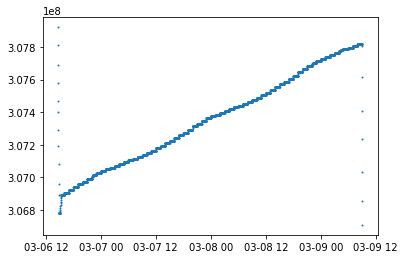

In [224]:
plt.scatter(df_cut['probingTimestamp'], df_cut['rowCount'], s=1)
plt.show()

In [225]:
df_cut.probingTimestamp.max()

Timestamp('2020-03-09 09:04:00.777000')

In [226]:
df_cut.probingTimestamp.min()

Timestamp('2020-03-06 14:38:00.850000')

In [227]:
filter2 = (df['timeDiff'] >= '0 days 00:00:55.000000') & (df['timeDiff'] <= '0 days 00:01:05.000000')

In [228]:
df[filter2]

,dataStream,rowCount,probingTimestamp,date,weekDay,timeDiff
3512,BCL_TaskCreation,314015548,2020-01-10 10:18:00.977,2020-01-10,4,0 days 00:01:00.467000
3513,BCL_TaskCreation,314015548,2020-01-10 10:19:00.610,2020-01-10,4,0 days 00:00:59.633000
3514,BCL_TaskCreation,314015548,2020-01-10 10:20:00.970,2020-01-10,4,0 days 00:01:00.360000
3515,BCL_TaskCreation,314015548,2020-01-10 10:21:00.440,2020-01-10,4,0 days 00:00:59.470000
3516,BCL_TaskCreation,314015548,2020-01-10 10:22:00.933,2020-01-10,4,0 days 00:01:00.493000
...,...,...,...,...,...,...
160365,BCL_TaskCreation,289702943,2020-05-02 07:56:00.117,2020-05-02,5,0 days 00:00:59.497000
160366,BCL_TaskCreation,289702943,2020-05-02 07:57:00.537,2020-05-02,5,0 days 00:01:00.420000
160369,BCL_TaskCreation,289702943,2020-05-02 07:58:00.083,2020-05-02,5,0 days 00:00:59.546000
160373,BCL_TaskCreation,289702943,2020-05-02 07:59:00.543,2020-05-02,5,0 days 00:01:00.460000


In [229]:
filter3 = (df['timeDiff'] > '0 days 00:01:05.000000')

In [230]:
df[filter3]

,dataStream,rowCount,probingTimestamp,date,weekDay,timeDiff
3505,BCL_TaskCreation,314015548,2020-01-10 10:16:29.063,2020-01-10,4,0 days 00:12:10.226000
431,BCL_TaskCreation,314557745,2020-01-11 03:30:07.070,2020-01-11,5,0 days 00:01:06.210000
432,BCL_TaskCreation,314557745,2020-01-11 03:32:02.533,2020-01-11,5,0 days 00:01:55.463000
3091,BCL_TaskCreation,315279286,2020-01-13 03:24:21.240,2020-01-13,0,0 days 00:01:20.733000
5111,BCL_TaskCreation,316510387,2020-01-14 03:41:09.813,2020-01-14,1,0 days 00:01:08.986000
...,...,...,...,...,...,...
158636,BCL_TaskCreation,289699068,2020-05-01 00:02:00.953,2020-05-01,4,0 days 00:02:00.360000
159217,BCL_TaskCreation,289699068,2020-05-01 00:04:00.810,2020-05-01,4,0 days 00:01:59.857000
158658,BCL_TaskCreation,289699633,2020-05-01 04:18:21.130,2020-05-01,4,0 days 00:01:20.650000
159527,BCL_TaskCreation,289699834,2020-05-01 08:03:00.837,2020-05-01,4,0 days 00:02:00.127000


In [231]:
df[filter3].timeDiff.max()

Timedelta('0 days 23:38:42.740000')

In [232]:
df[filter3].timeDiff.min()

Timedelta('0 days 00:01:05.047000')

In [233]:
filter4 = (df['timeDiff'] < '0 days 00:00:55.000000')

In [234]:
df[filter4]

,dataStream,rowCount,probingTimestamp,date,weekDay,timeDiff
3507,BCL_TaskCreation,314015548,2020-01-10 10:17:00.510,2020-01-10,4,0 days 00:00:31.447000
3090,BCL_TaskCreation,315279286,2020-01-13 03:25:00.563,2020-01-13,0,0 days 00:00:39.323000
5680,BCL_TaskCreation,316510387,2020-01-14 03:42:00.310,2020-01-14,1,0 days 00:00:50.497000
8176,BCL_TaskCreation,317467818,2020-01-16 04:17:00.473,2020-01-16,3,0 days 00:00:46.440000
8386,BCL_TaskCreation,317467818,2020-01-16 04:52:00.127,2020-01-16,3,0 days 00:00:39.317000
...,...,...,...,...,...,...
149686,BCL_TaskCreation,289654475,2020-04-24 11:49:00.497,2020-04-24,4,0 days 00:00:46.580000
150343,BCL_TaskCreation,289656817,2020-04-25 00:59:00.597,2020-04-25,5,0 days 00:00:43.340000
153280,BCL_TaskCreation,289673615,2020-04-27 00:29:00.490,2020-04-27,0,0 days 00:00:20.437000
154579,BCL_TaskCreation,289680854,2020-04-27 22:52:00.250,2020-04-27,0,0 days 00:00:38.877000


In [235]:
df[filter4].timeDiff.min()

Timedelta('0 days 00:00:17.350000')

In [236]:
df[filter4].timeDiff.max()

Timedelta('0 days 00:00:54.953000')